# Classification Trees using Python
#### Isabel De La Cruz

### Understanding Classification Trees

Classification trees is a supervised machine learning algorithm. The algorithm breaks down a dataset into smaller subsets all while a tree is incrementally developed.

A classification tree consists of nodes, edges/branch and leaf nodes that makes it a complete structure. 

- Nodes: Test for the value of a certain attribute
- Edges/Branch: Correspond to the outcome of a test and connect to the next node or leaf
- Leaf Nodes: Terminal nodes that predict the outcome 

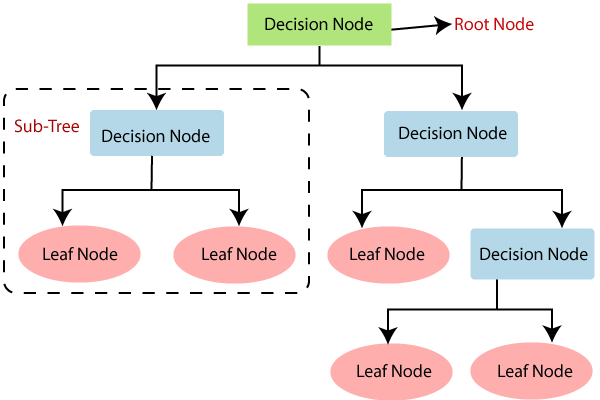

### Classification Tree Implementation

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [36]:
# Reading in the data
iris = pd.read_csv('iris_data.csv')
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# Splitting data into training and testing data

train_data = iris.loc[np.arange(0,50)].append(iris.loc[np.arange(60,100)],ignore_index=True).append(iris.loc[np.arange(100,140)],
                                                                                                   ignore_index=True)
test_data = iris.loc[np.arange(50,60)].append(iris.loc[np.arange(100,110)],ignore_index=True).append(iris.loc[np.arange(140,150)],
                                                                                                    ignore_index=True)

In [39]:
# Creating and training our model

features = train_data[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']] 
labels = np.array(train_data['class']) # target variable
tree_clf = tree.DecisionTreeClassifier(max_depth=4)
model = tree_clf.fit(features, labels)

In [40]:
# Using the model to predict the testing data

predictions = model.predict(test_data[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']])
pct_correct = 100 * np.count_nonzero(predictions==np.array(test_data['class'])) / len(test_data)
print('The decision tree model correctly predicted ', pct_correct, '% of the test data correctly', sep='')

The decision tree model correctly predicted 96.66666666666667% of the test data correctly


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\tree\_export.py:183: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 0.25.
  warnings.warn(("'rotate' has no effect and is deprecated in 0.23. "


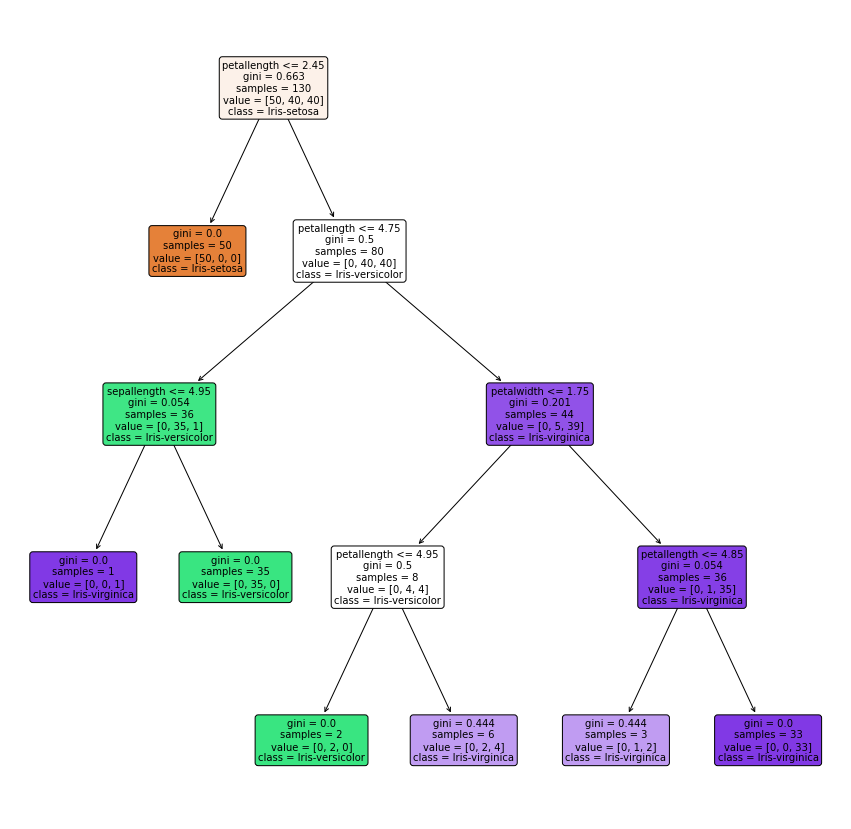

In [41]:
# Plotting the tree
plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names=['sepallength', 'sepalwidth', 'petallength', 'petalwidth'],
              class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled= True, fontsize=10,
              rounded=True, rotate=True)
plt.show()


### Understanding the Classification Tree

The Decision Node: 
   - The criteria for each observation 

Gini: 
   - Output for the criteria. The number indicates the lowest score the algorithm could find

Samples: 
   - Number of observations

Values: 
   - How many observations of setosa, veriscolor, virginica


Class: 
   - The classification of majority of the observations 

*If an observation meets the criteria, that observation is pushed down to the left.*

*If an observation answers the criteria negatively, then it is pushed down to the right.*